# Seaborn을 이용한 시각화
## class seaborn.FacetGrid(**kwargs)¶

__init__(self, data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)¶

* Matplotlib figure와 FacetGrid객체를 초기화

* FacetGrid객체 생성 --> FacetGrid.map() 혹은 FacetGrid.map_to_dateframe()을 통해 그리고자하는 plot함수와 피처를 매핑

* [seaborn을 사용한 FacetGrid튜터리얼](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)


In [ ]:
import seaborn as sns

* FacetGrid객체 초기화

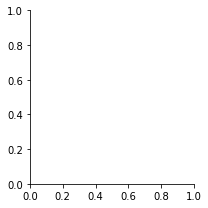

In [ ]:
#1.First Step
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)  # 데이터셋을 인자로 FacetGrid객체를 초기화

In [ ]:
display(tips.head(n=3))
display(tips.time.value_counts())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Dinner    176
Lunch      68
Name: time, dtype: int64

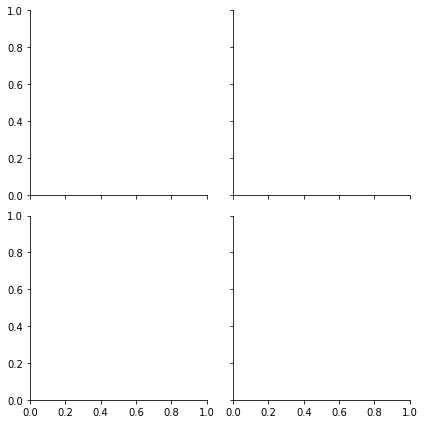

In [ ]:
sns.FacetGrid(tips, row="sex", col="time")

* `map`과 `map_dataframe`

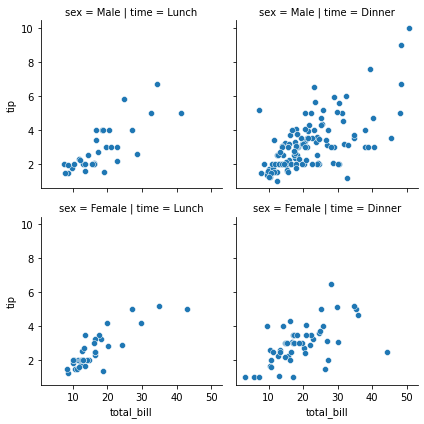

In [ ]:
g = sns.FacetGrid(tips, row="sex", col="time")
g.map(sns.scatterplot, "total_bill", "tip")

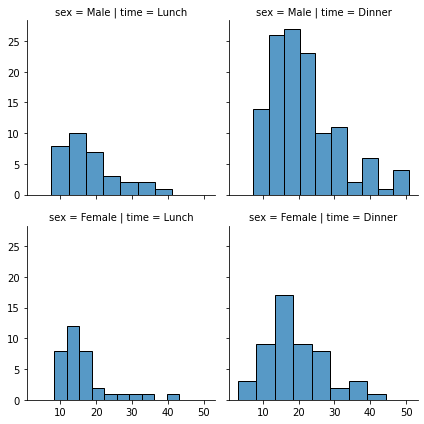

In [ ]:
g = sns.FacetGrid(tips, row="sex", col="time")
g.map_dataframe(sns.histplot, x="total_bill") # 피처의 이름만  던져주면 됨

* binwidth의 차이

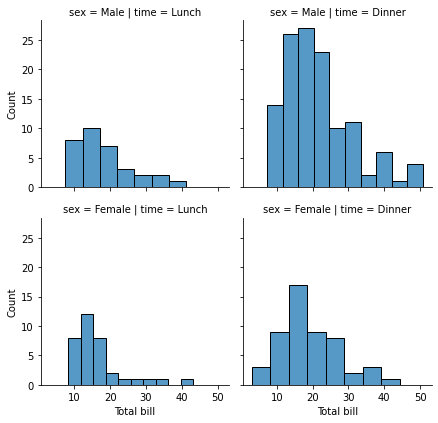

In [65]:
g = sns.FacetGrid(tips, row="sex", col="time")
g.map_dataframe(sns.histplot, "total_bill")
g.set_axis_labels("Total bill", "Count")

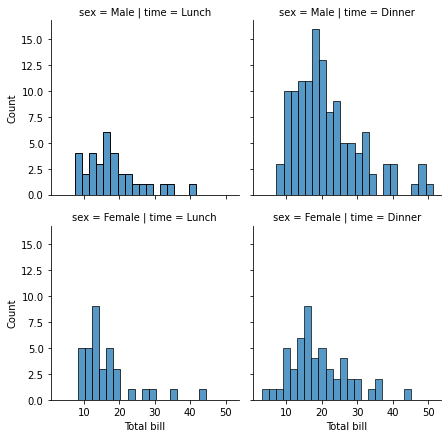

In [19]:
g = sns.FacetGrid(tips, row="sex", col="time")
g.map_dataframe(sns.histplot, x = "total_bill", binwidth=2)
g.set_axis_labels("Total bill", "Count")  # X축, Y축

* hue옵션의 차이점

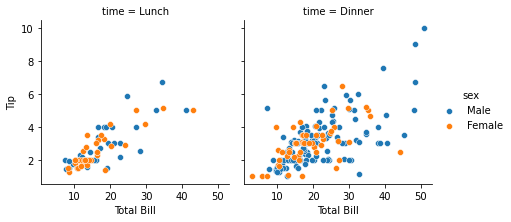

In [23]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x = "total_bill", y="tip")
g.set_axis_labels("Total Bill", "Tip")
g.add_legend()  #hue키워드 옵션을 추가하면 반드시 해주어야 함

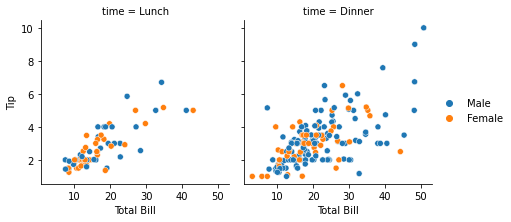

In [25]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")
g.set_axis_labels("Total Bill", "Tip")
g.add_legend()

* FacetGrid의 height옵션

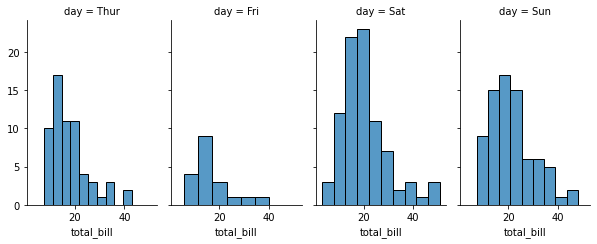

In [64]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.6)
g.map(sns.histplot, "total_bill")

* col정보가 복수개인 경우 컬럼정보를 col_wrap갯수만큼 로우를 분할

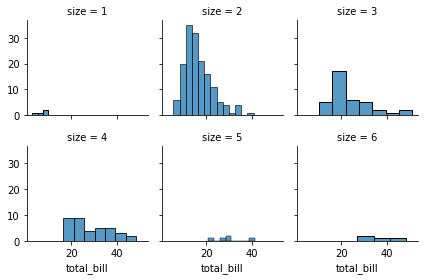

In [31]:
g = sns.FacetGrid(tips, col="size", height=2, col_wrap=3)
g.map(sns.histplot, "total_bill")

* annotation 

'Data size  :'

68

dict

dict_items([('color', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765))])

'Data size  :'

176

dict

dict_items([('color', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765))])

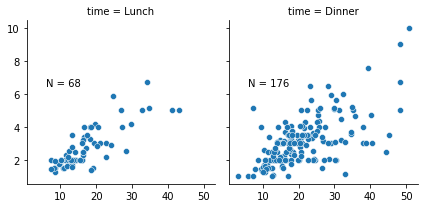

In [41]:
import matplotlib.pyplot as plt

def annotate(data, **kws):
  n = len(data)
  display("Data size  :", n)
  display(type(kws), kws.items())
  # Get the current ~matplotlib.axes.Axes instance on the current figure matching the given keyword args, or create one.
  ax = plt.gca()
  ax.text(.1, .6, f"N = {n}", transform = ax.transAxes)

g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x ="total_bill", y="tip")
g.set_axis_labels("Total Bill", "Tip")
g.map_dataframe(annotate)

In [42]:
tips[tips["time"]=='Lunch'].count()

total_bill    68
tip           68
sex           68
smoker        68
day           68
time          68
size          68
dtype: int64

* 타이틀 설정 매핑

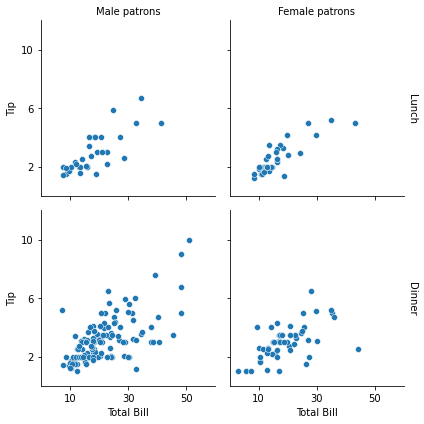

In [47]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y = "tip")
g.set_axis_labels("Total Bill", "Tip")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks = [2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")

* [RGBA색상](https://aboooks.tistory.com/279)
* [RGBA위키백과](https://ko.wikipedia.org/wiki/RGBA_%EC%83%89_%EA%B3%B5%EA%B0%84)

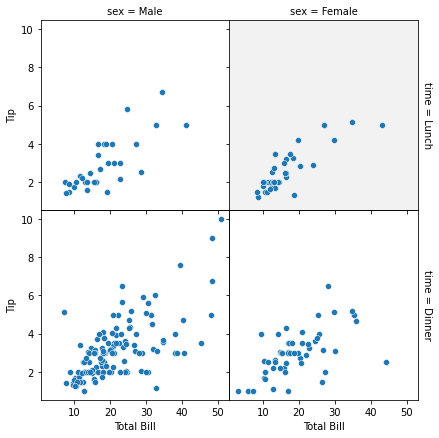

In [59]:
# margin_titles=True시와 False시에 타이틀의 위치가 다름에 유의.
# despine=False옵션은 축을 없앰
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total Bill", "Tip")
g.fig.subplots_adjust(wspace=0, hspace=0)

for (row_val, col_val), ax in g.axes_dict.items():
  if row_val =="Lunch" and col_val=="Female":
    ax.set_facecolor(".95")
  else:
    ax.set_facecolor((0, 0, 0, 0))